In [3]:
import torch
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn_v2(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

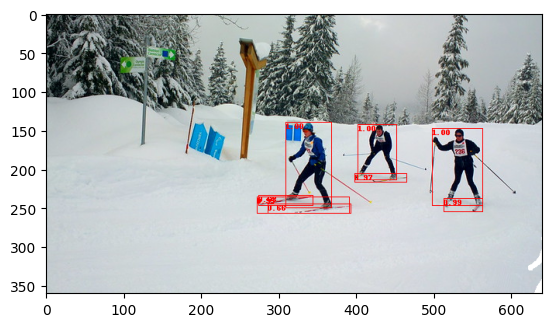

In [4]:
# Define the transformations to be applied to the input image
# Define the transformations
transform = transforms.Compose([
    # transforms.Resize((256, 256)),  # Resize the image to 256x256 pixels
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image
])

# Load a random image for evaluation
image_path = '/content/coco.jpg'
image = Image.open(image_path).convert("RGB")

# Apply transformations to the image
input_image = transform(image)
# iimage = transform(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Pass the input image through the model
with torch.no_grad():
    predictions = model(input_image)

# Check if predictions contain the expected keys
if 'boxes' in predictions[0] and 'scores' in predictions[0] and 'labels' in predictions[0] and 'masks' in predictions[0]:
    # Visualize the predictions
    def visualize_predictions(image, predictions):
        draw = ImageDraw.Draw(image)
        for box, score, label, mask in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels'], predictions[0]['masks']):
            if score > 0.5:  # Filter out low-confidence predictions
                draw.rectangle(box.tolist(), outline='red')
                draw.text((box[0], box[1]), f'{score:.2f}', fill='red')
                mask = mask[0].cpu().numpy()
                mask = (mask > 0.5).astype('uint8') * 255
                mask = Image.fromarray(mask, mode='L')
                image.paste(mask, (int(box[0]), int(box[1])), mask=mask)
        plt.imshow(image)
        plt.show()

    # Visualize the predictions on the input image
    visualize_predictions(image, predictions)
else:
    print("Error: Missing keys in predictions dictionary.")